In Assignment 6, you were given the age of scientists at the time of their most significant discoveries. One of the questions related to those data was this:

Before constructing a confidence interval for a set of observations over a long time period, we should be convinced the $y_i$s exhibit no biases or trends. If, for example, the age at which scientists made major discoveries decreased from century to century, the the parameter $\mu$ would no longer be a constant, and the confidence interval would be meaningless. Plot the age versus date for these twelve discoveries. Does the variability of the $y_i$s appear to be random with respect to time?

You are now in a position to something smarter than just eyeballing the data. Let $y_i$ denote the age of the $i$th scientist and $t_i$ denote the year of his or her significant discovery.

Formulate a linear model that allows you to test the hypothesis that there is no trend over the centuries in the age of discovery.

The model will be of the form
\begin{equation}
Y = \beta_0 + \beta_1 t + \epsilon.
\end{equation}

#### Compute $\hat{\beta}_{\text{OLS}}$

In [1]:
import numpy as np

In [6]:
# empirical ages
y = np.array([40, 34, 23, 40, 31, 33, 49, 33, 34, 43, 26, 39])
# empirical years
t = np.array([1543, 1600, 1665, 1746, 1774, 1839, 1858, 1864, 1896, 1901, 1905, 1926])
# Compute B_OLS
# column of 1s for constant term
a = np.full(shape=(t.size,1), fill_value=1)
X = np.column_stack(tup=(a, t.T))
# B_OLS
B = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

[[   1 1543]
 [   1 1600]
 [   1 1665]
 [   1 1746]
 [   1 1774]
 [   1 1839]
 [   1 1858]
 [   1 1864]
 [   1 1896]
 [   1 1901]
 [   1 1905]
 [   1 1926]]


#### Visualize data

In [12]:
from matplotlib import pyplot as plt

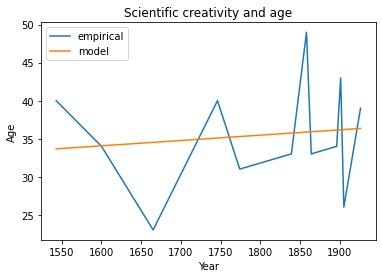

In [20]:
# clear figure
plt.clf()

# empirical data
plt.plot(t, y, label='empirical')

# model data
y_pred = [B[0] + B[1]*x for x in t]
plt.plot(t, y_pred, label='model')

# x axis
plt.xlabel("Year")

# y axis
plt.ylabel("Age")

# legend
plt.legend()

# title
plt.title("Scientific creativity and age")

# show
plt.show()

In [24]:
print(np.std(y))
print(np.mean(y))

6.921684926535029
35.416666666666664


#### Error term, $\epsilon$

In [27]:
# Compute the error term
# observed data minus predicted data
e = y - X.dot(B)
print(e)

[  6.33726806  -0.06249581 -11.51836688   4.91354763  -4.2828276
  -2.73869867  13.12804671  -2.91403369  -2.13846253   6.82647047
 -10.20158314   2.65113544]


#### Residual standard errors, $s$

In [26]:
# We have N=t.size observations in our case
N = t.size
# There are 2 variates in our case
K = 2
# Residual standard error
s = np.sqrt(e.T.dot(e))/np.sqrt(N-K)
print(s)

7.522867951289087


#### $t$-statistics

In [43]:
# Compute t-statistics.  The null hypothesis is B_1\equiv 0
# null betas
B0 = [np.mean(y), 0]
print(B0)
T = []
for k in range(K):
    t = (B[k]-B0[k])/(s * np.sqrt(np.linalg.inv(X.T.dot(X))[k][k]))
    T.append(t)
print(T)

[35.416666666666664, 0]
[-0.39742902545687886, 0.39836834560667306]


#### $p$-value of $t$-statistic

In [44]:
from scipy.stats import t

In [45]:
# initiate rv with t(N-K) distribution
a = t(df=N-K)
print(2*a.cdf(T[0]))
print(2*(1-a.cdf(T[1])))

0.6994019373107467
0.6987314461981904


#### Reject Null hypotheses?

No.

#### $R^2$

In [51]:
# R^2
#R2 = 1 - ( e.T.dot(e)) / (np.var(y)*y.size)
#print(R2)
# The caltech notes use the definitions below, and they disagree.
# They are the same, but they disagree with the one above
# with the one above
# R2 = B.T.dot(X.T).dot(X).dot(B) / (y.T.dot(y))
R2 = 1 - e.T.dot(e)/(y.T.dot(y))
print(R2)

0.963784768533607


#### Adjusted $\bar{R}^2$

In [52]:
# adjusted R2
adjR2 = 1 - (N-1)/(N-K)*(1-R2)
print(adjR2)

0.9601632453869676


#### $F$ statistics

In [56]:
# Compute t-statistics.  The null hypothese are B\equiv 0
F = []
for k in range(K):
    f = B[k]**2 * np.linalg.inv(X.T.dot(X))[k][k]**(-1) / s**2
    #print(S[i] * np.sqrt(np.linalg.inv(X[i].T.dot(X[i]))[k][k]))
    F.append(f)
print(F)

[0.5210664931658892, 0.15869733878139777]


#### $p$-value of $F$-statistic

In [57]:
from scipy.stats import f

a = f(dfn=K-1, dfd=N-K)

print(1-a.cdf(F[1]))

0.6987314461981902


#### Sum of squared residuals

for i in range(1,4+1):
    print(E[i].T.dot(E[i]))

#### Normal residuals?

Below we perform a Kolmogorov-Smirnov test.  We fail to reject the null hypothesis (that they are normally distributed) for all 4 data sets. $\square$

from scipy import stats

K = 2
for i in range(1, 4+1):
    e = E[i]
    N = e.size
    # u_null = 0
    u = 0
    # We don't know \sigma!  So we have to estimate it...
    # We estimate it as as the residual standard error
    s = np.sqrt(e.T.dot(e)/(N-K))
    # print(s)
    # null distribution...with estimated s!
    G = stats.norm(loc=u, scale=s)
    # perform k test
    print(stats.kstest(rvs=e, cdf=G.cdf, alternative='two-sided'))